<a href="https://colab.research.google.com/github/Gilf641/EVA4/blob/master/S13/OpenCV_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import cv2
import numpy as np

In [32]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [33]:
# Load YOLO
net = cv2.dnn.readNet("/content/gdrive/My Drive/yolo/yolov3.weights", "/content/gdrive/My Drive/yolo/yolov3.cfg")
classes = []
with open("/content/gdrive/My Drive/yolo/coco.names.txt", "r") as f:
  classes = [line.strip() for line in f.readlines()]
del classes[80:83] # this was some extras space that got added by mistake, change later don't forget
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [34]:
len(classes)

80

In [35]:
net.getUnconnectedOutLayers()

array([[200],
       [227],
       [254]], dtype=int32)

In [36]:
layer_names = net.getLayerNames()
# net.getUnconnectedOutLayers()
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
# output_layers
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Loading image

In [37]:
img1 = cv2.imread("/content/gdrive/My Drive/yolo/ocvYolo-Almg2.jpeg") # read the image using OpenCV
img2 = cv2.imread("/content/gdrive/My Drive/yolo/bookImage.jpg")

img = cv2.resize(img1, None, fx=0.4, fy=0.4) # Resize the image, with 
height, width, channels = img.shape # (512, 384, 3)

In [38]:
# Detecting Objects
blob = cv2.dnn.blobFromImage(img1, 0.00392, size=(416,416), mean=(0,0,0), swapRB=True, crop=False)
net.setInput(blob)
output = net.forward(output_layers)
output

[array([[0.04853195, 0.03036103, 0.2780383 , ..., 0.        , 0.        ,
         0.        ],
        [0.05511126, 0.03235305, 0.24453717, ..., 0.        , 0.        ,
         0.        ],
        [0.05376402, 0.02602348, 0.93363297, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.96284044, 0.9538155 , 0.40065226, ..., 0.        , 0.        ,
         0.        ],
        [0.96274155, 0.96724796, 0.28330928, ..., 0.        , 0.        ,
         0.        ],
        [0.969591  , 0.9631798 , 0.83481747, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.02594059, 0.02476995, 0.05824539, ..., 0.        , 0.        ,
         0.        ],
        [0.01918535, 0.02591499, 0.20185044, ..., 0.        , 0.        ,
         0.        ],
        [0.02793384, 0.01735387, 0.09298319, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9769965 , 0.9756351 , 0.03900284, ..., 0.        , 0.        ,
         0.        

In [39]:
bbox = []
class_ids = []
confidences = []

for o in output:
  for detection in o: # detection consists of bounding boxes i.e 10467
    scores = detection[5:] # this is because first 5 will be AnchorBox Dimensions+Objectness Parameter
    class_id = np.argmax(scores) # returns the index of max classificatin score
    confidence = scores[class_id] # returns score

    if confidence > 0.5:
      # kinda normalizing the values wrt image dim
      centerX = int(detection[0]*width)
      centerY = int(detection[1]*height)
      w = int(detection[2]*width)
      h = int(detection[3]*height)

      # BBox Coordinates
      x = int(centerX - w/2)
      y = int(centerY - w/2)

      # appending Values 
      bbox.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)


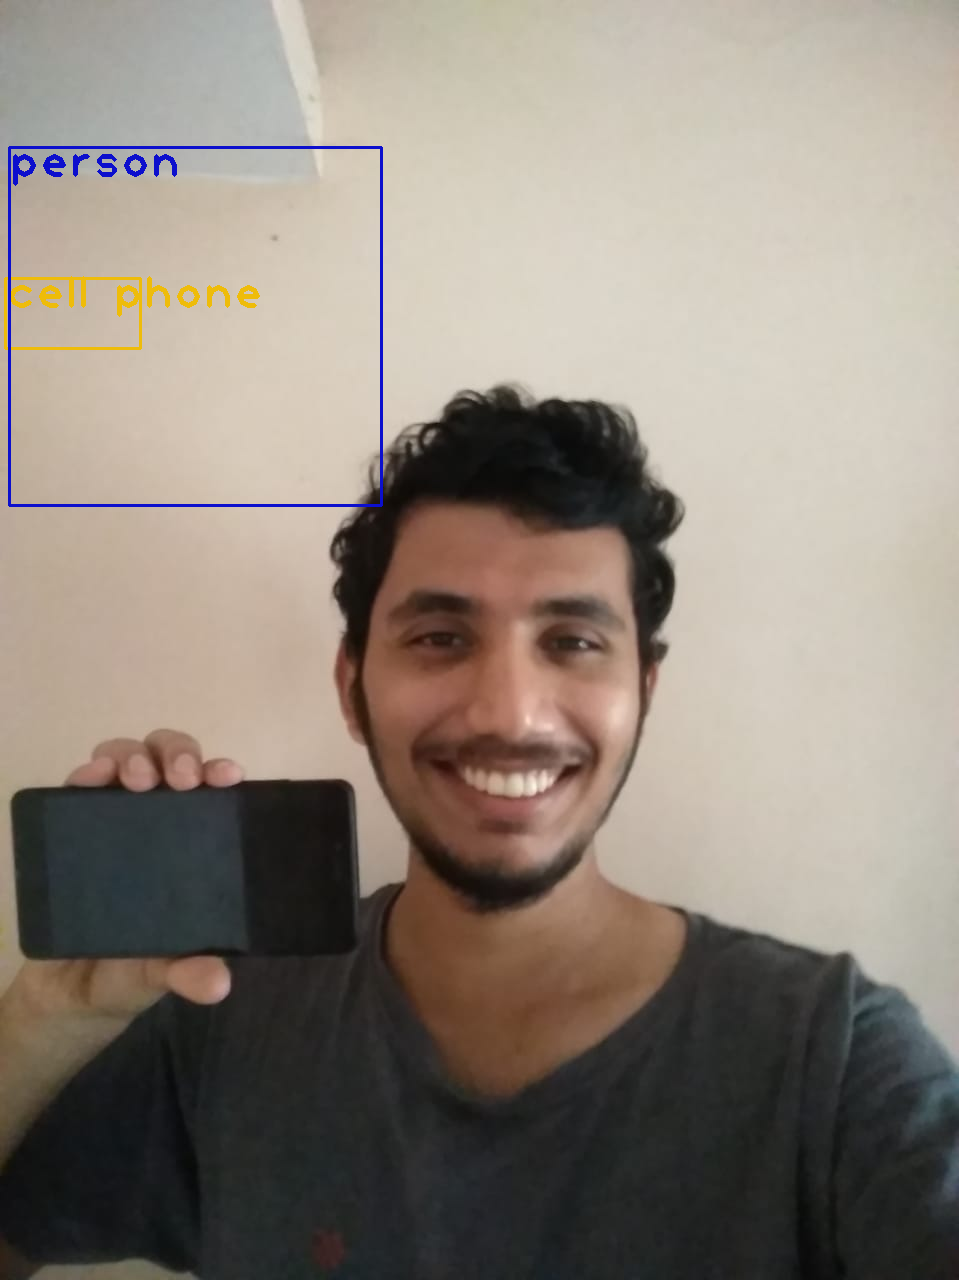

In [40]:
from google.colab.patches import cv2_imshow

indexes = cv2.dnn.NMSBoxes(bbox, confidences, 0.5, 0.4) # performing Non-Max Suppression, with 0.5 being Confidence & 0.4 NMS Threshold Value
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(bbox)):
    if i in indexes:
        x, y, w, h = bbox[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img1, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img1, label, (x, y + 30), font, 3, color, 3)
cv2_imshow(img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
bbox

[[5, 278, 135, 70], [9, 147, 372, 358]]

In [42]:
len(output)

3